## CCS2313 Data Mining
## Agglomerative Clustering

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


In [17]:
# Step 1: Load dataset
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
df = pd.read_csv(url)

# Step 2: Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


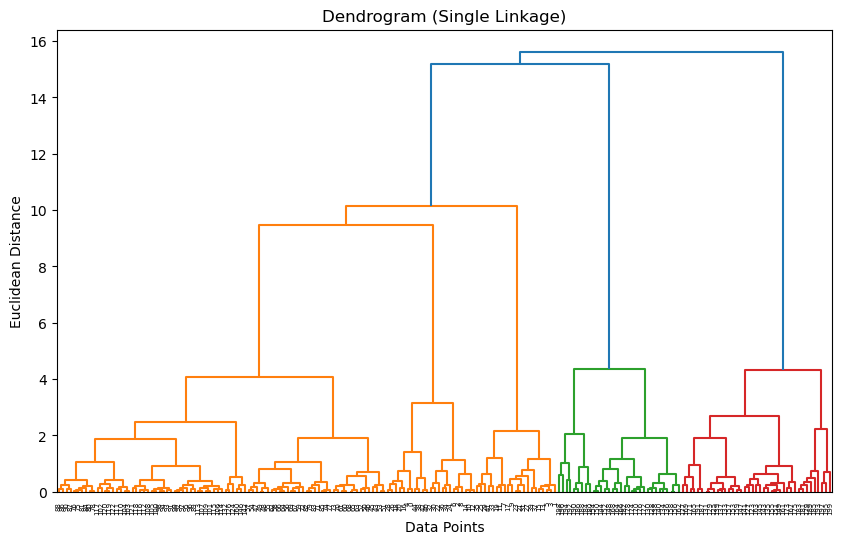

In [18]:
# Step 4: Plot the dendrogram to decide the number of clusters
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Step 5: Fit Agglomerative Clustering
agg = AgglomerativeClustering(
    n_clusters=5,            # Chosen based on dendrogram cut
   # affinity='euclidean',    # Distance metric
    linkage='single'           # Linkage criterion
)
df['Cluster'] = agg.fit_predict(X_scaled)




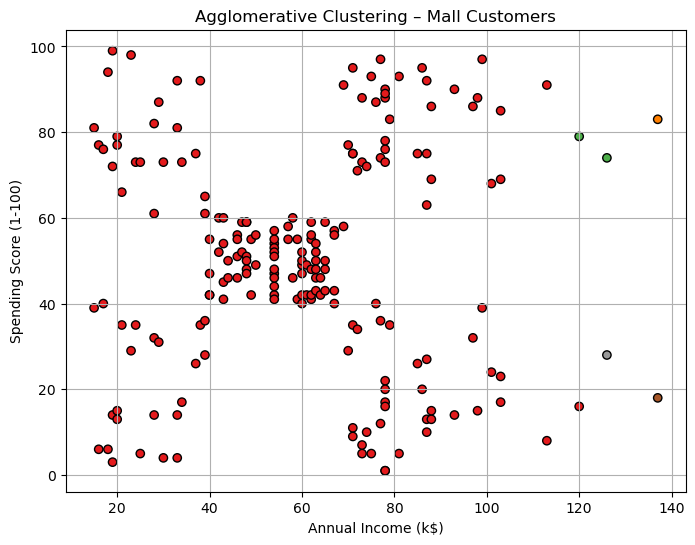

Silhouette Score: 0.276


In [19]:
# Step 6: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='Set1', edgecolor='k')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering – Mall Customers')
plt.grid(True)
plt.show()

# Step 7: Silhouette Score
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")